In [62]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    """ Sigmoid function.
    This function accepts any shape of np.ndarray object as input and perform sigmoid operation.
    """
    return 1 / (1 + np.exp(-x))


def der_sigmoid(y):
    """ First derivative of Sigmoid function.
    The input to this function should be the value that output from sigmoid function.
    """
    return y * (1 - y)


class GenData:
    @staticmethod
    def _gen_linear(n=100):
        """ Data generation (Linear)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data = np.random.uniform(0, 1, (n, 2))

        inputs = []
        labels = []

        for point in data:
            inputs.append([point[0], point[1]])

            if point[0] > point[1]:
                labels.append(0)
            else:
                labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def _gen_xor(n=100):
        """ Data generation (XOR)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data_x = np.linspace(0, 1, n // 2)

        inputs = []
        labels = []

        for x in data_x:
            inputs.append([x, x])
            labels.append(0)

            if x == 1 - x:
                continue

            inputs.append([x, 1 - x])
            labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def fetch_data(mode, n):
        """ Data gather interface

        Args:
            mode (str): 'Linear' or 'XOR', indicate which generator is used.
            n (int):    the number of data points generated in total.
        """
        assert mode == 'Linear' or mode == 'XOR'

        data_gen_func = {
            'Linear': GenData._gen_linear,
            'XOR': GenData._gen_xor
        }[mode]

        return data_gen_func(n)



class SimpleNet:

    def __init__(self, num_step=20000, print_interval=500, lr=5e-1):
        """ A hand-crafted implementation of simple network.

        Args:
            num_step (optional):    the total number of training steps.
            print_interval (optional):  the number of steps between each reported number.
        """
        self.num_step = num_step
        self.print_interval = print_interval
        self.lr = lr

        # Model parameters initialization
        # hidden layer 1: 100 nodes
        # hidden layer 2: 10 nodes
        # Please initiate your network parameters here.

        # use normal distribution to initialize weights
        avg = 0
        sigma = 1
        self.hidden1_weights = np.random.normal(avg, sigma, 100*2).reshape(100, 2)
        self.hidden2_weights = np.random.normal(avg, sigma, 10*100).reshape(10, 100)
        self.output_weights = np.random.normal(avg, sigma, 1*10).reshape(1, 10)
        # if initialize all weights to 0, XOR will train very very slow
        # self.hidden1_weights = np.zeros((100, 2))
        # self.hidden2_weights = np.zeros((10, 100))
        # self.output_weights = np.zeros((1, 10))

        # initialize all bias to 1
        self.hidden1_biases = np.ones((100, 1))
        self.hidden2_biases = np.ones((10, 1))
        self.output_biases = np.ones((1, 1))

    @staticmethod
    def plot_result(data, gt_y, pred_y):
        """ Data visualization with ground truth and predicted data comparison. There are two plots
        for them and each of them use different colors to differentiate the data with different labels.

        Args:
            data:   the input data
            gt_y:   ground truth to the data
            pred_y: predicted results to the data
        """
        assert data.shape[0] == gt_y.shape[0]
        assert data.shape[0] == pred_y.shape[0]

        plt.figure()

        plt.subplot(1, 2, 1)
        plt.title('Ground Truth', fontsize=18)

        for idx in range(data.shape[0]):
            if gt_y[idx] == 0:
                plt.plot(data[idx][0], data[idx][1], 'ro')
            else:
                plt.plot(data[idx][0], data[idx][1], 'bo')

        plt.subplot(1, 2, 2)
        plt.title('Prediction', fontsize=18)

        for idx in range(data.shape[0]):
            if pred_y[idx] == 0:
                plt.plot(data[idx][0], data[idx][1], 'ro')
            else:
                plt.plot(data[idx][0], data[idx][1], 'bo')

        plt.show()

    def forward( self, inputs ):
        """ Implementation of the forward pass.
        It should accepts the inputs and passing them through the network and return results.
        """
        """ FILL IN HERE """
        inputs = inputs.T  # (2x1)

        # hidden1_sigmoid = sigmoid( h1_weight(100x2) dot input(2x1) + h1_bias(100x1) )
        hidden1 = np.dot(self.hidden1_weights, inputs) + self.hidden1_biases
        hidden1_sigmoid = sigmoid(hidden1)

        # hidden2_sigmoid = sigmoid( h2_weight(10x100) dot h1_sigmoid(100x1) + h2_bias(10x1) )
        hidden2 = np.dot(self.hidden2_weights, hidden1_sigmoid) + self.hidden2_biases
        hidden2_sigmoid = sigmoid(hidden2)

        # output_layer = sigmoid( output_weights(1x10) dot h2_sigmoid(10x1) + output_bias )
        output_layer = np.dot(self.output_weights, hidden2_sigmoid) + self.output_biases
        output_sigmoid = sigmoid(output_layer)

        # will be used when doing backpropagation
        self.inputs = inputs
        self.hidden1_sigmoid = hidden1_sigmoid
        self.hidden2_sigmoid = hidden2_sigmoid
        self.output_sigmoid = output_sigmoid

        return output_sigmoid

    def backward( self ):
        """ Implementation of the backward pass.
        It should utilize the saved loss to compute gradients and update the network all the way to the front.
        """
        # learning_rate = 1e-2  # already saved as self.lr
        """ FILL IN HERE """
        self.ground_truth = self.ground_truth.reshape(self.output.shape)

        # calculate gradients
        d_output_sigmoid = -((self.ground_truth / self.output) - ((1-self.ground_truth) / (1-self.output)))
        d_output = d_output_sigmoid * der_sigmoid(self.output_sigmoid)
        output_gradients = np.dot(d_output, self.hidden2_sigmoid.T) # (1x10) = (1x1) * (1x10)

        d_hidden2_sigmoid = np.dot(self.output_weights.T, d_output)
        d_hidden2 = d_hidden2_sigmoid * der_sigmoid(self.hidden2_sigmoid)
        hidden2_gradients = np.dot(d_hidden2, self.hidden1_sigmoid.T) # (10x100) = (10x1) * (1x100)

        d_hidden1_sigmoid = np.dot(self.hidden2_weights.T, d_hidden2)
        d_hidden1 = d_hidden1_sigmoid * der_sigmoid(self.hidden1_sigmoid)
        hidden1_gradients = np.dot(d_hidden1, self.inputs.T) # (100x2) = (100x1) * (1x2)

        # update weights
        self.output_weights -= self.lr * output_gradients
        self.hidden2_weights -= self.lr * hidden2_gradients
        self.hidden1_weights -= self.lr * hidden1_gradients

    def train(self, inputs, labels):
        """ The training routine that runs and update the model.

        Args:
            inputs: the training (and testing) data used in the model.
            labels: the ground truth of correspond to input data.
        """
        # make sure that the amount of data and label is match
        assert inputs.shape[0] == labels.shape[0]

        n = inputs.shape[0]

        for epochs in range(self.num_step):
            for idx in range(n):
                # operation in each training step:
                #   1. forward passing
                #   2. compute loss
                #   3. propagate gradient backward to the front
                self.ground_truth = labels[idx:idx+1, :] # saved for backpropagation
                self.output = self.forward(inputs[idx:idx+1, :])
                self.error = self.output - labels[idx:idx+1, :]
                """ apply your backward function: """
                """ FILL IN HERE """
                self.backward()

            if epochs % self.print_interval == 0:
                print('Epochs {}: '.format(epochs))
                self.test(inputs, labels)

        print('Training finished')
        self.test(inputs, labels)

    def test(self, inputs, labels):
        """ The testing routine that run forward pass and report the accuracy.

        Args:
            inputs: the testing data. One or several data samples are both okay.
                The shape is expected to be [BatchSize, 2].
            labels: the ground truth correspond to the inputs.
        """
        n = inputs.shape[0]

        error = 0.0
        for idx in range(n):
            result = self.forward(inputs[idx:idx+1, :])
            error += abs(result - labels[idx:idx+1, :])

        error /= n
        """ Print or plot your results in your preferred forms"""
        print('test accuracy: %.2f'%((1-error)*100) + '%')

Epochs 0: 
test accuracy: 61.51%
Epochs 500: 
test accuracy: 97.20%
Epochs 1000: 
test accuracy: 99.98%
Epochs 1500: 
test accuracy: 99.99%
Epochs 2000: 
test accuracy: 100.00%
Epochs 2500: 
test accuracy: 100.00%
Epochs 3000: 
test accuracy: 100.00%
Epochs 3500: 
test accuracy: 100.00%
Epochs 4000: 
test accuracy: 100.00%
Epochs 4500: 
test accuracy: 100.00%
Epochs 5000: 
test accuracy: 100.00%
Epochs 5500: 
test accuracy: 100.00%
Epochs 6000: 
test accuracy: 100.00%
Epochs 6500: 
test accuracy: 100.00%
Epochs 7000: 
test accuracy: 100.00%
Epochs 7500: 
test accuracy: 100.00%
Epochs 8000: 
test accuracy: 100.00%
Epochs 8500: 
test accuracy: 100.00%
Epochs 9000: 
test accuracy: 100.00%
Epochs 9500: 
test accuracy: 100.00%
Epochs 10000: 
test accuracy: 100.00%
Epochs 10500: 
test accuracy: 100.00%
Epochs 11000: 
test accuracy: 100.00%
Epochs 11500: 
test accuracy: 100.00%
Epochs 12000: 
test accuracy: 100.00%
Epochs 12500: 
test accuracy: 100.00%
Epochs 13000: 
test accuracy: 100.00%
Ep

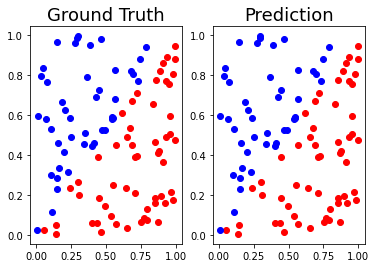

In [63]:
data, label = GenData.fetch_data('Linear', 100)

net = SimpleNet()
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result.T)

Epochs 0: 
test accuracy: 49.93%
Epochs 500: 
test accuracy: 73.59%
Epochs 1000: 
test accuracy: 73.66%
Epochs 1500: 
test accuracy: 73.65%
Epochs 2000: 
test accuracy: 73.59%
Epochs 2500: 
test accuracy: 73.67%
Epochs 3000: 
test accuracy: 73.69%
Epochs 3500: 
test accuracy: 73.66%
Epochs 4000: 
test accuracy: 71.68%
Epochs 4500: 
test accuracy: 73.64%
Epochs 5000: 
test accuracy: 73.68%
Epochs 5500: 
test accuracy: 74.24%
Epochs 6000: 
test accuracy: 93.69%
Epochs 6500: 
test accuracy: 99.91%
Epochs 7000: 
test accuracy: 99.98%
Epochs 7500: 
test accuracy: 99.99%
Epochs 8000: 
test accuracy: 99.99%
Epochs 8500: 
test accuracy: 99.99%
Epochs 9000: 
test accuracy: 99.99%
Epochs 9500: 
test accuracy: 99.99%
Epochs 10000: 
test accuracy: 100.00%
Epochs 10500: 
test accuracy: 100.00%
Epochs 11000: 
test accuracy: 100.00%
Epochs 11500: 
test accuracy: 100.00%
Epochs 12000: 
test accuracy: 100.00%
Epochs 12500: 
test accuracy: 100.00%
Epochs 13000: 
test accuracy: 100.00%
Epochs 13500: 
tes

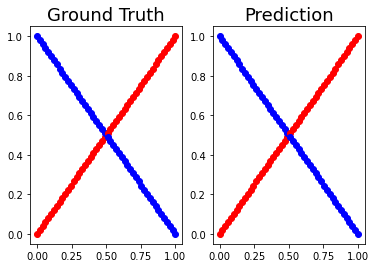

In [64]:
data, label = GenData.fetch_data('XOR', 100)

net = SimpleNet()
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result.T)


# Comparison when epoch=20,000

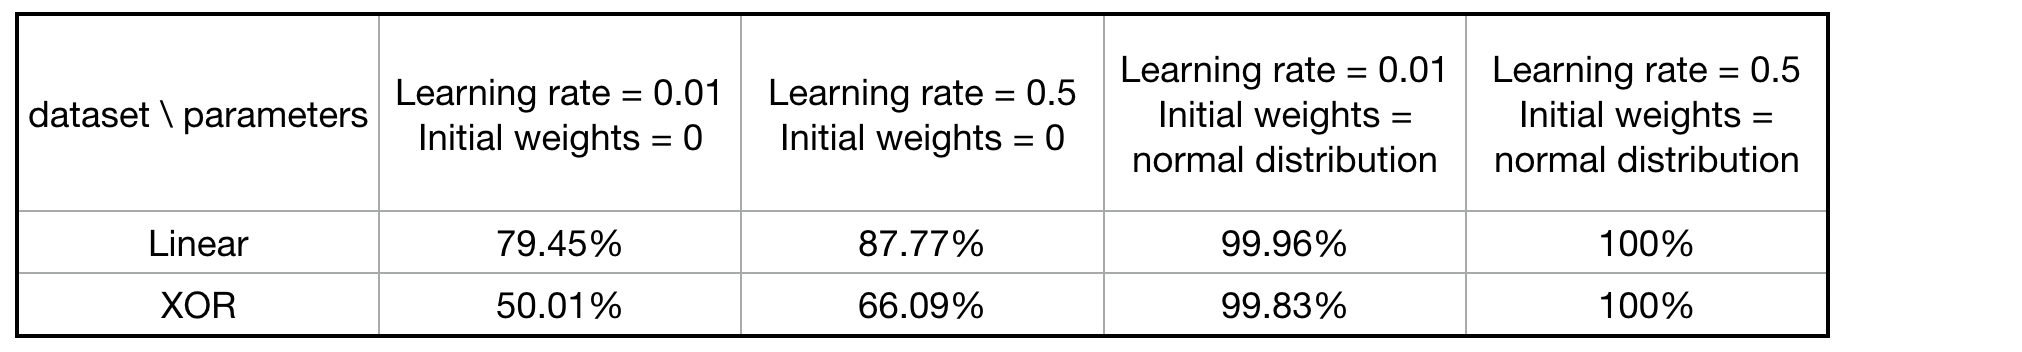

我原本把weight全部初始化成0，發現XOR會一直都是50%，我就以為把權重初始成0會train不起來，但是又覺得理論上應該要可以才對，把weight印出來看也確實有在更新，我就直接改train兩萬個epoch才發現他是真的有在更新只是超級慢，後來把learning rate調成0.5才真的有在更新的感覺。

後來經過高人指點，發現如果用標準常態分佈去初始權重，可以train的更快，實驗結果也證實同樣是兩萬個epoch，用標準常態分佈去初始權重可以有比較好的performance。